# **<span style="color: RED;">THỰC HÀNH 4: PHÂN VÙNG ẢNH</span>**

## **<span style="color: RED;">1. CÀI ĐẶT THƯ VIỆN</span>**

In [11]:
%pip install opencv-python
%pip install Pillow
%pip install imageio
%pip install scipy
%pip install matplotlib
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.2/12.8 MB 3.5 MB/s eta 0:00:04
   - -------------------------------------- 0.5/12.8 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.8 MB 7.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/12.8 MB 8.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/12.8 MB 6.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.7/12.8 MB 9.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.3/12.8 MB 9.9 MB/s eta 0:00:01
   ----------- ---------------------------- 3.8/12.8 MB 10.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.9/12.8 MB 10.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.6/12.8 MB 10.0 MB/s eta 0:00:01
   ----------------- ---------------------- 5.5/12.8 MB 10.9 MB/s eta 0:00:01
   ----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\ASUS ROG STRIX\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **<span style="color: RED;">2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH</span>**

### 2.1 Phân vùng theo histogram

##### 2.1.1 Phương pháp Otsu

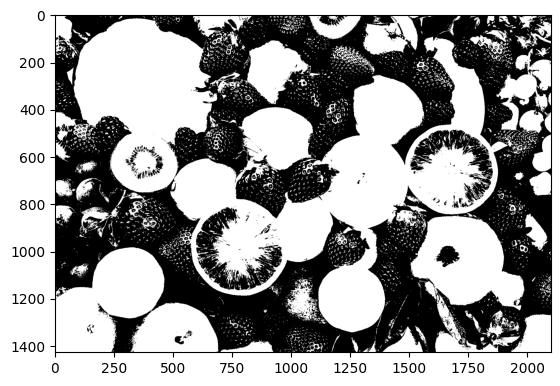

In [12]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than theshold are kept
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

##### 2.1.2 Phương pháp Adaptive Thresholding

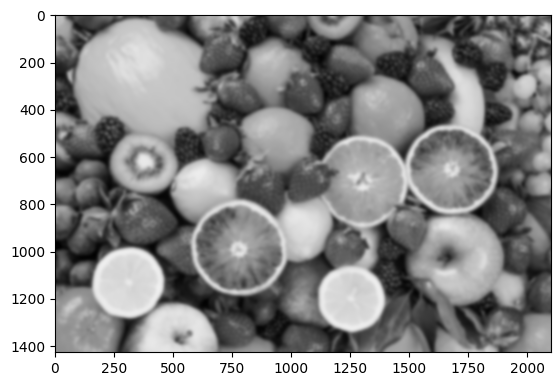

In [13]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()


### 2.2 Phân vùng theo region

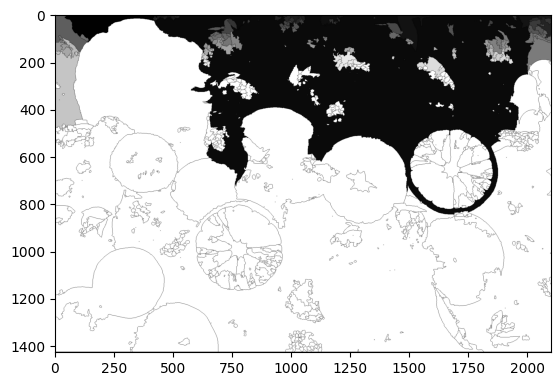

In [14]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')
# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu's method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain
# pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


### 2.3 Biến đổi đối tượng trong ảnh

##### 2.3.1 Sử dụng binary_dilation

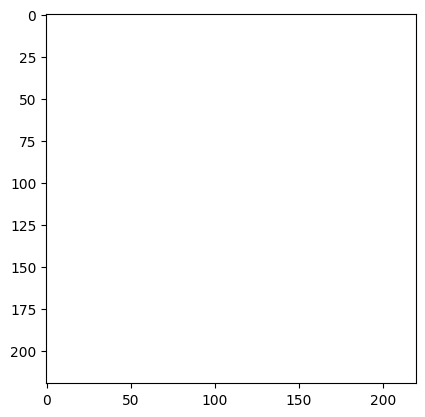

In [15]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


##### 2.3.2 Sử dụng binary_opening

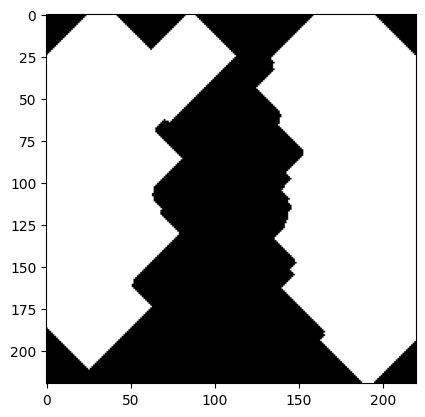

In [16]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


##### 2.3.3 Sử dụng binary_erosion

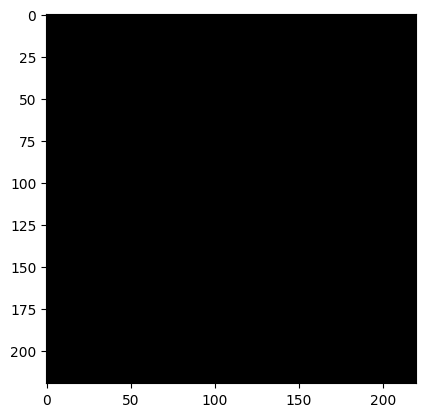

In [17]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


##### 2.3.4 Sử dụng binary_closing

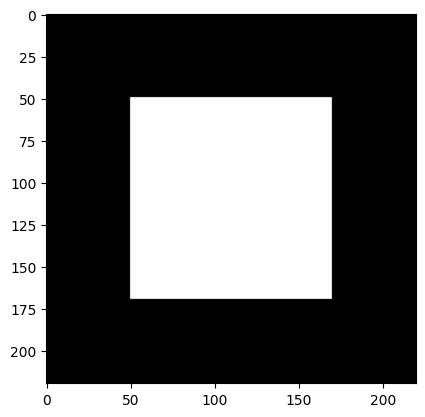

In [18]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


## **<span style="color: RED;">3. BÀI TẬP</span>**

    Bài 1: Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.


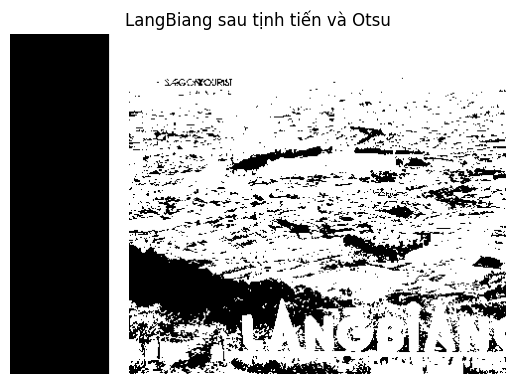

Đã lưu ảnh kết quả với tên 'lang_biang.jpg'


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file 'exercise/dalat.jpg'")

height, width = img.shape[:2]

# Giả định vùng LangBiang ở góc trên trái, kích thước 1/3 chiều rộng và 1/3 chiều cao
w, h = width // 3, height // 3
x, y = 0, 0

# Chọn vùng ROI LangBiang
roi = img[y:y+h, x:x+w]

# Tịnh tiến vùng chọn sang phải 100px
x_shift = 100
# Tạo ảnh nền đen cùng kích thước roi
shifted_roi = np.zeros_like(roi)
if x_shift < w:
    shifted_roi[:, x_shift:] = roi[:, :w - x_shift]

# Chuyển sang ảnh xám để xử lý Otsu
gray = cv2.cvtColor(shifted_roi, cv2.COLOR_BGR2GRAY)

# Áp dụng phương pháp Otsu để phân vùng
# Otsu tự động tìm ngưỡng, không cần nhập ngưỡng 0.3 (0.3 không áp dụng trực tiếp với Otsu)
_, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Hiển thị ảnh kết quả
plt.imshow(otsu_thresh, cmap='gray')
plt.title('LangBiang sau tịnh tiến và Otsu')
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
cv2.imwrite('lang_biang.jpg', otsu_thresh)
print("Đã lưu ảnh kết quả với tên 'lang_biang.jpg'")


    Bài 2: Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise.Xoay đối tượng vừa chọn một góc 45° và dùng phương pháp Adaptive Thresholding với
    ngưỡng 60, sau đó lưu vào máy với tên ho_xuan_huong.jpg.


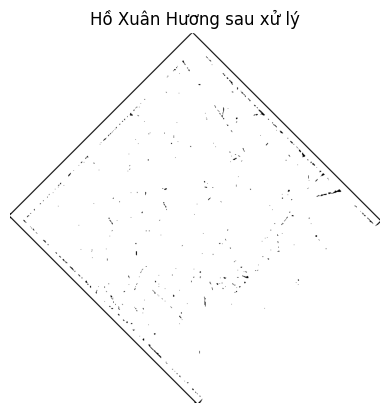

Đã lưu ảnh kết quả với tên 'ho_xuan_huong.jpg'


In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file 'exercise/dalat.jpg'")

# Lấy kích thước ảnh
height, width = img.shape[:2]

# Xác định vùng Hồ Xuân Hương (ô giữa dòng trên)
w, h = width // 3, height // 2
x = w      # cột giữa
y = 0      # dòng trên

roi = img[y:y+h, x:x+w]

# Xoay vùng chọn 45 độ quanh tâm
(h_roi, w_roi) = roi.shape[:2]
center = (w_roi // 2, h_roi // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
# Tính kích thước mới sau khi xoay
nW = int((h_roi * sin) + (w_roi * cos))
nH = int((h_roi * cos) + (w_roi * sin))
# Điều chỉnh ma trận để tâm ảnh không bị lệch
M[0, 2] += (nW / 2) - center[0]
M[1, 2] += (nH / 2) - center[1]
rotated = cv2.warpAffine(roi, M, (nW, nH))

# Chuyển sang ảnh xám
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)

# Áp dụng Adaptive Thresholding với ngưỡng 60
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 60)

# Hiển thị kết quả
plt.imshow(thresh, cmap='gray')
plt.title('Hồ Xuân Hương sau xử lý')
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
cv2.imwrite('ho_xuan_huong.jpg', thresh)
print("Đã lưu ảnh kết quả với tên 'ho_xuan_huong.jpg'")


    Bài 3: Viết chương trình chọn Quảng trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên quan_truong_lam_vien.jpg.

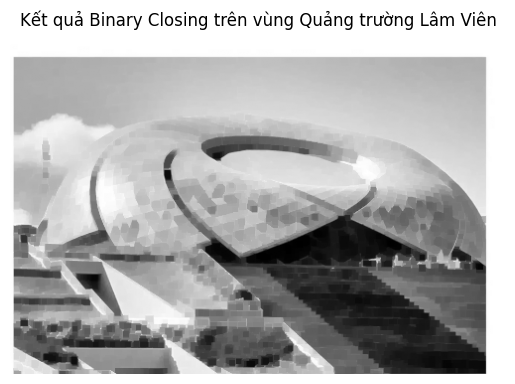

Đã lưu ảnh kết quả với tên 'quan_truong_lam_vien.jpg'


In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Không tìm thấy file 'exercise/dalat.jpg'")

# Lấy kích thước ảnh
height, width = img.shape[:2]

# Tính toán tọa độ vùng chọn Quảng trường Lâm Viên
w, h = width // 3, height // 3
x = width - w
y = 0

# Chọn vùng ROI
roi = img[y:y+h, x:x+w]

# Coordinate Mapping (ở đây giữ nguyên vùng chọn)
coordinate_mapped = roi.copy()

# Chuyển vùng chọn sang ảnh xám để xử lý nhị phân
roi_gray = cv2.cvtColor(coordinate_mapped, cv2.COLOR_BGR2GRAY)

# Áp dụng Binary Closing: dilation rồi erosion
kernel = np.ones((5,5), np.uint8)
dilated = cv2.dilate(roi_gray, kernel, iterations=1)
closed = cv2.erode(dilated, kernel, iterations=1)

# Hiển thị kết quả
plt.imshow(closed, cmap='gray')
plt.title('Kết quả Binary Closing trên vùng Quảng trường Lâm Viên')
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
cv2.imwrite('quan_truong_lam_vien.jpg', closed)
print("Đã lưu ảnh kết quả với tên 'quan_truong_lam_vien.jpg'")


    Bài 4: Tạo menu

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Đọc ảnh
img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def show_img(img, title='Image'):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Các hàm xử lý
def coordinate_mapping(img):
    return cv2.warpAffine(img, np.float32([[1, 0, 0], [0, 1, 0]]), (img.shape[1], img.shape[0]))

def rotate(img):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
    return cv2.warpAffine(img, M, (w, h))

def scale(img):
    return cv2.resize(img, None, fx=0.5, fy=0.5)

def shift(img):
    M = np.float32([[1, 0, 50], [0, 1, 50]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def adaptive_thresholding(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

def binary_dilation(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

def binary_erosion(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def otsu(img):
    _, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th

# Menu lựa chọn
print("Menu:")
print("1. geometric_transformation")
print("   1. coordinate_mapping")
print("   2. Rotate")
print("   3. Scale")
print("   4. Shift")
print("2. segment")
print("   1. Adaptive_thresholding")
print("   2. Binary_dilation")
print("   3. Binary_erosion")
print("   4. Otsu")

# Nhập lựa chọn
choice1 = input("Chọn nhóm (1: geometric_transformation, 2: segment): ")
choice2 = input("Chọn chức năng (1-4): ")

# Xử lý lựa chọn đầu tiên
if choice1 == '1':
    if choice2 == '1':
        result = coordinate_mapping(img)
    elif choice2 == '2':
        result = rotate(img)
    elif choice2 == '3':
        result = scale(img)
    elif choice2 == '4':
        result = shift(img)
    else:
        print("Lựa chọn không hợp lệ!")
        result = img
    show_img(result, 'Result')
elif choice1 == '2':
    if choice2 == '1':
        result = adaptive_thresholding(img_gray)
    elif choice2 == '2':
        result = binary_dilation(img_gray)
    elif choice2 == '3':
        result = binary_erosion(img_gray)
    elif choice2 == '4':
        result = otsu(img_gray)
    else:
        print("Lựa chọn không hợp lệ!")
        result = img_gray
    show_img(result, 'Result')
else:
    print("Lựa chọn không hợp lệ!")

# Hỏi có muốn kết hợp 2 chức năng không
combine = input("Bạn có muốn kết hợp với nhóm còn lại không? (y/n): ")
if combine.lower() == 'y':
    if choice1 == '1':
        # Đã chọn geometric_transformation, giờ chọn segment
        choice3 = input("Chọn chức năng segment (1-4): ")
        if choice3 == '1':
            result2 = adaptive_thresholding(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))
        elif choice3 == '2':
            result2 = binary_dilation(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))
        elif choice3 == '3':
            result2 = binary_erosion(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))
        elif choice3 == '4':
            result2 = otsu(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))
        else:
            print("Lựa chọn không hợp lệ!")
            result2 = result
        show_img(result2, 'Kết hợp')
    elif choice1 == '2':
        # Đã chọn segment, giờ chọn geometric_transformation
        choice3 = input("Chọn chức năng geometric_transformation (1-4): ")
        if choice3 == '1':
            result2 = coordinate_mapping(cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
        elif choice3 == '2':
            result2 = rotate(cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
        elif choice3 == '3':
            result2 = scale(cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
        elif choice3 == '4':
            result2 = shift(cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
        else:
            print("Lựa chọn không hợp lệ!")
            result2 = result
        show_img(result2, 'Kết hợp')
